# 📘 Pre-entrega y Proyecto Final Integrador

**Nombre del alumno:** Gabriel Feldman

## 🧩 Etapa 1: Recopilación y Preparación de Datos
**Objetivo:** Demostrar habilidades en Python, familiaridad con el entorno de trabajo y conocimientos básicos sobre manipulación de datos.

### 1️⃣ Carga de datos (corresponde a la etapa 1 - punto 1)

In [1]:
# TODO: Cargar los datasets como DataFrames usando pandas.
# Sugerencia: utilizar pd.read_csv() para cargar los archivos CSV.
# Recordá verificar la ruta correcta y revisar las primeras filas con .head().

# Importar las librerías que necesitaremos para trabajar. pandas y numpy.

import pandas as pd
import numpy as np

# Seteo algunas variables de pandas para que todo se vea en ancho de 200 caracteres.
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 200)


# Ejecutá este código para acceder a tus archivos en Drive:

from google.colab import drive
drive.mount('/content/drive')

# Vas a tener que autorizar el acceso y copiar un código que te da Google

# Rutas a los archivos
ruta_base = '/content/drive/MyDrive/datasets/'

# Creamos los dataframes

clientes = pd.read_csv(ruta_base + 'clientes.csv')
ventas = pd.read_csv(ruta_base + 'ventas.csv')
marketing = pd.read_csv(ruta_base + 'marketing.csv')

# Verificamos que se cargaron correctamente
print("Clientes:")
print(clientes.head(), "\n")

print("Ventas:")
print(ventas.head(), "\n")

print("Marketing:")
print(marketing.head())

# Paso 3 (opcional): verificar estructura
# Podés revisar las dimensiones y columnas de cada DataFrame:
# Es un for in que recorre una lista de tuplas del tipo pares ordenados. Imprime el nombre mostrando cantidad de filas y columnas de cada dataframe.
# Y muestra el nombre de las columnas.

for nombre, df in [("Clientes", clientes), ("Ventas", ventas), ("Marketing", marketing)]:
    print(f"{nombre}: {df.shape[0]} filas, {df.shape[1]} columnas")
    print(df.columns, "\n")


Mounted at /content/drive
Clientes:
   id_cliente               nombre  edad         ciudad  ingresos
0           1      Aloysia Screase    44  Mar del Plata  42294.68
1           2  Kristina Scaplehorn    25        Posadas  24735.04
2           3       Filip Castagne    50    Resistencia  35744.85
3           4          Liuka Luard    39   Bahía Blanca  27647.96
4           5        Dore Cockshtt    28        Rosario  28245.65 

Ventas:
   id_venta           producto   precio  cantidad fecha_venta          categoria
0       792  Cuadro decorativo   $69.94       5.0  02/01/2024         Decoración
1       811    Lámpara de mesa  $105.10       5.0  02/01/2024         Decoración
2      1156           Secadora   $97.96       3.0  02/01/2024  Electrodomésticos
3      1372           Heladera  $114.35       8.0  02/01/2024  Electrodomésticos
4      1546           Secadora  $106.21       4.0  02/01/2024  Electrodomésticos 

Marketing:
   id_campanha         producto  canal  costo fecha_inicio 

### 2️⃣ Análisis exploratorio inicial (corresponde a la etapa 1 - punto 4)

In [2]:
# TODO: Realizar un análisis exploratorio inicial de los DataFrames.
# Sugerencia: usar métodos como .info(), .describe(), .shape y .columns. dtypes.
# Esto te ayudará a entender la estructura y el contenido de los datos.
# Podés incluir comentarios sobre observaciones iniciales.

dataframes = {
    "Clientes": clientes,
    "Ventas": ventas,
    "Marketing": marketing
}

for nombre, df in dataframes.items():
    print(f"\n{'='*30}\n📊 {nombre}\n{'='*30}") # Título del dataset

    # Tamaño del DataFrame
    print(f"Forma (filas, columnas): {df.shape}\n") # Dimensiones del dataframe

    # Tipos de datos y valores nulos
    print("Información general:") # Nos informan información general de cada dataframe (clase, cantidad de filas, detalles de las columnas)
    print(df.info())

    # Estadísticas descriptivas (solo columnas numéricas, toma datos estadisticos, como media, desvio standar, maximo valor , minimo valor, etc)
    print("\nEstadísticas descriptivas:")
    print(df.describe())

    # Nombres de columnas
    print("\nColumnas:")
    print(df.columns.tolist()) # Genera una lista con el nombre de las columnas

    # Tipos de datos
    print("\nTipos de datos:") # Detalla las columnas con sus tipos de datos correspondientes
    print(df.dtypes)

    print("\nPrimeras filas del DataFrame:")
    print(df.head(), "\n") # Muestra una tabla con las primeras 5 filas de cada dataframe



📊 Clientes
Forma (filas, columnas): (567, 5)

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB
None

Estadísticas descriptivas:
       id_cliente        edad      ingresos
count  567.000000  567.000000    567.000000
mean   284.000000   37.940035  34668.739012
std    163.823075   10.202885  12974.531446
min      1.000000   20.000000    170.290000
25%    142.500000   30.000000  26015.240000
50%    284.000000   37.000000  35066.830000
75%    425.500000   43.000000  42457.100000
max    567.000000   81.000000  88053.010000

Columnas:
['id_cliente', 'nombre', 'edad', 'ciud

### 3️⃣ Calidad de los datos (corresponde a la etapa 1 - punto 5)

In [3]:
# TODO: Identificar valores nulos y duplicados en los conjuntos de datos.
# Sugerencia: usar .isna().sum() y .duplicated().sum().
# Documentar las observaciones con print() o comentarios.

# --- Evaluar la calidad de los datos ---

# Acá lo que vamos a hacer es analizar los nulos por cada columna de cada dataframe,
# calcular la cantidad de nulos por cada dataframe, y finalmente ver cuantas filas duplicadas
# hay en cada dataframe.

dataframes = {
    "Clientes": clientes,
    "Ventas": ventas,
    "Marketing": marketing
}

for nombre, df in dataframes.items():
    print(f"\n{'='*40}\n🧹 {nombre} - Calidad de los datos\n{'='*40}")

    # Valores nulos por columna
    print("Valores nulos por columna:")
    print(df.isna().sum())

    # Total de valores nulos en el DataFrame
    total_nulos = df.isna().sum().sum()
    print(f"\nTotal de valores nulos en todo el dataset: {total_nulos}")

    # Filas duplicadas
    duplicados = df.duplicated().sum()
    print(f"Filas duplicadas: {duplicados}")

    # Observaciones
    if total_nulos == 0 and duplicados == 0:
        print("✅ No se detectaron valores nulos ni duplicados.")
    else:
        print("⚠️ Se encontraron posibles problemas de calidad en los datos.")

# Qué hace cada parte:
# df.isna().sum() → muestra cuántos valores faltan por columna.
# df.isna().sum().sum() → cuenta el total de valores nulos en todo el dataset.
# df.duplicated().sum() → cuenta cuántas filas están duplicadas.
# El bloque final imprime un resumen legible.


🧹 Clientes - Calidad de los datos
Valores nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Total de valores nulos en todo el dataset: 0
Filas duplicadas: 0
✅ No se detectaron valores nulos ni duplicados.

🧹 Ventas - Calidad de los datos
Valores nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Total de valores nulos en todo el dataset: 4
Filas duplicadas: 35
⚠️ Se encontraron posibles problemas de calidad en los datos.

🧹 Marketing - Calidad de los datos
Valores nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Total de valores nulos en todo el dataset: 0
Filas duplicadas: 0
✅ No se detectaron valores nulos ni duplicados.


## 🧹 Etapa 2: Preprocesamiento y Limpieza de Datos
**Objetivo:** Demostrar conocimiento de las técnicas de limpieza y transformación de datos.

### 4️⃣ Limpieza de datos (corresponde a la etapa 2 - punto 1)

In [4]:
# TODO: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados.
# Sugerencia: aplicar .drop_duplicates(), .str.strip(), .str.replace() según el caso.
# Documentar el proceso y los resultados.

# --- Crear DataFrames limpios a partir de los originales ---

# Copiar los DataFrames originales
clientes_limpio = clientes.copy()
ventas_limpio = ventas.copy()
marketing_limpio = marketing.copy()

# Crear un diccionario para iterar fácilmente
dataframes_limpios = {
    "Clientes": clientes_limpio,
    "Ventas": ventas_limpio,
    "Marketing": marketing_limpio
}

for nombre, df in dataframes_limpios.items():
    print(f"\n{'='*40}\n🧹 {nombre} - Limpieza de datos\n{'='*40}")

    # 1️⃣ Eliminar filas duplicadas
    duplicados_antes = df.duplicated().sum()
    df.drop_duplicates(inplace=True)
    duplicados_despues = df.duplicated().sum()
    print(f"Duplicados antes: {duplicados_antes}, después: {duplicados_despues}")

    # 2️⃣ Limpiar columnas de tipo texto (object)
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.strip()
        df[col] = df[col].str.replace(r'[\n\t]', '', regex=True)

    # 3️⃣ Mostrar resultado de limpieza
    print("Primeras filas después de la limpieza:")
    print(df.head())

# --- Normalizar tipos de datos ---

# --- Normalizar tipos de datos (numéricos y fechas) en los DataFrames limpios ---

# Clientes
clientes_limpio['edad'] = pd.to_numeric(clientes_limpio['edad'], errors='coerce')
clientes_limpio['ingresos'] = pd.to_numeric(clientes_limpio['ingresos'], errors='coerce')

# Ventas

# Quitar signos de dólar, comas y espacios
ventas_limpio['precio'] = ventas_limpio['precio'].str.replace(r'[\$,]', '', regex=True)
# Convertir a número
ventas_limpio['precio'] = pd.to_numeric(ventas_limpio['precio'], errors='coerce')

ventas_limpio['cantidad'] = pd.to_numeric(ventas_limpio['cantidad'], errors='coerce')
ventas_limpio['fecha_venta'] = pd.to_datetime(ventas_limpio['fecha_venta'], errors='coerce')

# Marketing
marketing_limpio['costo'] = pd.to_numeric(marketing_limpio['costo'], errors='coerce')
marketing_limpio['fecha_inicio'] = pd.to_datetime(marketing_limpio['fecha_inicio'], errors='coerce', dayfirst=True)
marketing_limpio['fecha_fin'] = pd.to_datetime(marketing_limpio['fecha_fin'], errors='coerce', dayfirst=True)
print("\nPrimeras filas después de la limpieza:")
print("\n***************** Ventas Limpio *****************\n")
print(ventas_limpio.head())
print("\n***************** Clientes Limpio *****************\n")
print(clientes_limpio.head())
print("\n***************** Marketing Limpio *****************\n")
print(marketing_limpio.head())



🧹 Clientes - Limpieza de datos
Duplicados antes: 0, después: 0
Primeras filas después de la limpieza:
   id_cliente               nombre  edad         ciudad  ingresos
0           1      Aloysia Screase    44  Mar del Plata  42294.68
1           2  Kristina Scaplehorn    25        Posadas  24735.04
2           3       Filip Castagne    50    Resistencia  35744.85
3           4          Liuka Luard    39   Bahía Blanca  27647.96
4           5        Dore Cockshtt    28        Rosario  28245.65

🧹 Ventas - Limpieza de datos
Duplicados antes: 35, después: 0
Primeras filas después de la limpieza:
   id_venta           producto   precio  cantidad fecha_venta          categoria
0       792  Cuadro decorativo   $69.94       5.0  02/01/2024         Decoración
1       811    Lámpara de mesa  $105.10       5.0  02/01/2024         Decoración
2      1156           Secadora   $97.96       3.0  02/01/2024  Electrodomésticos
3      1372           Heladera  $114.35       8.0  02/01/2024  Electrodomés

### 5️⃣ Transformación de datos (corresponde a la etapa 2 - punto 2)

In [5]:
# TODO: Aplicar filtros y transformaciones para crear una tabla de ventas
# que muestre solo los productos con alto rendimiento. calcular el percentil 80
# y filtrar los productos que superen ese umbral en ventas.
#quantile(0.8)
# Sugerencia: usar .query() o condiciones con operadores lógicos.

# Primero creamos una columna que represente el valor total vendido por registro:

ventas_limpio["ingreso"] = ventas_limpio["precio"] * ventas_limpio["cantidad"]

print("\n*" * 1, "Agregando la columna ingreso\n")

print(ventas_limpio.head())

# Luego calculamos el percentil 80:

umbral_80 = ventas_limpio["ingreso"].quantile(0.8)
print(f"\nUmbral del percentil 80: {umbral_80}")

# Y ahora filtramos los productos que superan ese valor:

# Tenemos 2 Opciones

# Opción 1: Usando condiciones lógicas (filtramos con una condición)
# ventas_top = ventas_limpio[ventas_limpio["valor_total"] > umbral_80]
# ventas_top = ventas_top.sort_values(by="valor_total", ascending=False)

# Opción 2: Usando query() (más elegante)
ventas_top = ventas_limpio.query("ingreso > @umbral_80")
ventas_top = ventas_top.sort_values(by="ingreso", ascending=False)

# Los mejores
print("\n*" * 1,"Productos de alto rendimiento (percentil > 80):\n")
print(ventas_top.head())


* Agregando la columna ingreso

   id_venta           producto  precio  cantidad fecha_venta          categoria  ingreso
0       792  Cuadro decorativo   69.94       5.0  2024-02-01         Decoración   349.70
1       811    Lámpara de mesa  105.10       5.0  2024-02-01         Decoración   525.50
2      1156           Secadora   97.96       3.0  2024-02-01  Electrodomésticos   293.88
3      1372           Heladera  114.35       8.0  2024-02-01  Electrodomésticos   914.80
4      1546           Secadora  106.21       4.0  2024-02-01  Electrodomésticos   424.84

Umbral del percentil 80: 787.336

* Productos de alto rendimiento (percentil > 80):

      id_venta    producto  precio  cantidad fecha_venta          categoria  ingreso
550       2063  Smartphone  124.01      12.0  2024-05-03        Electrónica  1488.12
912       1109    Batidora  123.83      12.0  2024-11-04  Electrodomésticos  1485.96
866       2373  Smartphone  123.60      12.0  2024-07-04        Electrónica  1483.20
2345   

### 6️⃣ Agregación (corresponde a la etapa 2 - punto 3)

*   Elemento de lista
*   Elemento de lista



In [6]:
# TODO: Resumir las ventas por categoría de producto y analizar los ingresos generados.
# Sugerencia: usar .groupby() y .agg() para generar métricas como suma y promedio.

# Vamos ahora a agrupar por categoría y sumar ingresos por categoría de productos vendidos, el promedio de ingresos por
# categoría y la cantidad de ventas por categoría.

# Agrupamos por categoría y calculamos suma, promedio y cantidad de ventas por producto
resumen_categoria = ventas_limpio.groupby('categoria').agg(
    total_ingresos=('ingreso', 'sum'),   # suma de ingresos
    promedio_venta=('ingreso', 'mean'),  # promedio por venta (se vendió a un precio promedio de tanto)
    cantidad_ventas=('ingreso', 'count') # cantidad de registros/ventas
).reset_index()

# Ordenamos de mayor a menor por total_ingresos
resumen_categoria = resumen_categoria.sort_values(by='total_ingresos', ascending=False)

# Mostramos el resultado
print(resumen_categoria)


           categoria  total_ingresos  promedio_venta  cantidad_ventas
1  Electrodomésticos       505299.63       505.29963             1000
2        Electrónica       482577.80       483.54489              998
0         Decoración       479216.09       479.21609             1000


### 7️⃣ Integración de datos, opcional, NO OBLIGATORIO (corresponde a la etapa 2 - punto 4)

In [7]:
# TODO: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.
# Sugerencia: usar pd.merge() especificando la clave común entre ambos DataFrames.
# Documentar cualquier observación relevante sobre la combinación de datos.


# # Limpiamos nombres de producto para que coincidan (los normalizamos, se supone qnue ya venía normalizados de antes)
# ventas_limpio['producto_clean'] = ventas_limpio['producto'].str.lower().str.strip()
# marketing_limpio['producto_clean'] = marketing_limpio['producto'].str.lower().str.strip()

# # Paso 1: Ventas agregadas por producto
# ventas_por_producto = ventas_limpio.groupby('producto_clean', as_index=False).agg(
#     valor_total=('valor_total', 'sum'),        # ingreso total por producto
#     unidades_vendidas=('cantidad', 'sum'),     # total de unidades vendidas
#     cantidad_ventas=('id_venta', 'count')     # cantidad de ventas distintas
# )

# print("")
# print(ventas_por_producto.head(15))
# print("")

# # Paso 2: Merge con marketing para ver campañas/canales, creando el dataframe ventas_marketing
# # Merge simple por producto
# ventas_marketing = pd.merge(
#     ventas_por_producto,
#     marketing_limpio[['producto_clean', 'id_campanha', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']],
#     on='producto_clean',
#     how='left'   # conservamos todos los productos vendidos, aunque no tengan campaña
# )

# print("")
# print(ventas_marketing.head(15))
# print("")


# # Opcional: Si querés ver qué productos tiene cada campaña:

# resumen_camp = ventas_marketing.groupby('id_campanha', as_index=False).agg(
#     productos=('producto_clean', lambda x: list(x.unique()))
# )

# print("")
# print(resumen_camp.head(15))
# print("")



# *************************************************************************************

# 7️⃣ Integración de datos: Informe de ingresos y costos de marketing por producto

# ============================================
# 1️⃣ Cálculo del ingreso total por producto
# ============================================

# Primero, creamos la columna 'ingreso' en ventas (esto ya lo habíamos hecho más arriba)
ventas_limpio["ingreso"] = ventas_limpio["precio"] * ventas_limpio["cantidad"]

# Agrupamos por producto y sumamos los ingresos
ingresos_por_producto = (
    ventas_limpio.groupby("producto", as_index=False)["ingreso"]
    .sum()
    .rename(columns={"ingreso": "total_ingresos"})
)

print("==========================")
print("💰 Ingresos totales por producto")
print("==========================")
print(ingresos_por_producto.head(20))




# ============================================
# 2️⃣ Cálculo del costo total de marketing por producto
# ============================================

# Agrupamos el costo de marketing por producto
costos_por_producto = (
    marketing_limpio.groupby("producto", as_index=False)["costo"]
    .sum()
    .rename(columns={"costo": "total_costo_marketing"})
)

print("\n==========================")
print("📊 Costos totales de marketing por producto")
print("==========================")
print(costos_por_producto.head())


# ============================================
# 3️⃣ Integración (merge) de ambos datasets
# ============================================

# Unimos ingresos y costos por producto
informe_financiero = pd.merge(
    ingresos_por_producto,
    costos_por_producto,
    on="producto",
    how="left"  # usamos left join para mantener productos aunque no tengan campaña
)

# Llenamos nulos de costo con 0 (productos sin marketing)
informe_financiero["total_costo_marketing"] = informe_financiero["total_costo_marketing"].fillna(0)

print("\n==========================")
print("📈 Informe financiero por producto")
print("==========================")
print(informe_financiero.head())


# ============================================
# 4️⃣ (Opcional) Cálculo de ganancia neta estimada
# ============================================

# Si querés agregar una columna de ganancia estimada:
informe_financiero["ganancia_neta_estimada"] = (
    informe_financiero["total_ingresos"] - informe_financiero["total_costo_marketing"]
)

print("\n==========================")
print("💵 Informe completo con ganancia estimada")
print("==========================")
print(informe_financiero.head())





💰 Ingresos totales por producto
                  producto  total_ingresos
0          Adorno de pared        48093.49
1                 Alfombra        44773.06
2               Aspiradora        50085.86
3              Auriculares        74175.58
4                 Batidora        50979.20
5                 Cafetera        59607.31
6               Candelabro        11128.80
7   Consola de videojuegos        46174.41
8                 Cortinas        44865.03
9        Cuadro decorativo        54297.60
10          Cámara digital        45217.96
11   Elementos de cerámica        45411.09
12       Espejo decorativo        46783.31
13      Freidora eléctrica        50155.15
14                Heladera        25736.80
15         Horno eléctrico        49913.90
16       Jarrón decorativo        51130.88
17                  Laptop        46179.48
18                Lavadora        48946.44
19         Lámpara de mesa        82276.38

📊 Costos totales de marketing por producto
          producto  t

## 🧩 Etapa 3: Análisis de Datos
Objetivo: Realizar análisis estadístico y exploratorio sobre los datos procesados.  (Aca arranca la segunda parte correspondiente al Proyecto Final Integrador)


### 1️⃣ ETAPA 3 - Punto 1. Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.

In [8]:
# Seleccionamos la columna ingreso
# ventas_ingreso = ventas_limpio['ingreso']

# print(ingresos_por_producto.head(20))

ventas_ingreso = ingresos_por_producto['total_ingresos']

# Genero una planilla con el dataframe ingresos_por_producto para analizarla
ingresos_por_producto.to_excel('/content/drive/MyDrive/ingresos_por_producto.xlsx', index=False)


# print(ventas_ingreso.head(20))
# media = df['ingreso_total'].mean()

# Medidas de tendencia central
# media = ventas_ingreso.mean()

media = ventas_ingreso.mean()

media = round(ingresos_por_producto['total_ingresos'].mean(),2)

print("El promedio de ventas por producto es de ", media)
mediana = ventas_ingreso.median()
moda = ventas_ingreso.mode()[0]

# Medidas de dispersión
desviacion_std = ventas_ingreso.std()
varianza = ventas_ingreso.var()
minimo = ventas_ingreso.min()
maximo = ventas_ingreso.max()
rango = maximo - minimo
percentil_25 = ventas_ingreso.quantile(0.25)
percentil_50 = ventas_ingreso.quantile(0.5)
percentil_75 = ventas_ingreso.quantile(0.75)
iqr = percentil_75 - percentil_25

El promedio de ventas por producto es de  48903.12


## Lo mostramos en formato tabla

In [9]:
# Crear un diccionario con las medidas
estadistica_dict = {
    'Medida': [
        'Media', 'Mediana', 'Moda',
        'Desviación Estándar', 'Varianza',
        'Mínimo', 'Máximo', 'Rango',
        'Percentil 25', 'Percentil 50','Percentil 75', 'Rango Intercuartílico (IQR)'
    ],
    'Valor': [
        f"{media:.2f}",
        f"{mediana:.2f}",
        f"{moda:.2f}",
        f"{desviacion_std:.2f}",
        f"{varianza:.2f}",
        f"{minimo:.2f}",
        f"{maximo:.2f}",
        f"{rango:.2f}",
        f"{percentil_25:.2f}",
        f"{percentil_50:.2f}",
        f"{percentil_75:.2f}",
        f"{iqr:.2f}"
      ]
}

# Crear DataFrame
informe_estadistico = pd.DataFrame(estadistica_dict)
informe_estadistico.to_excel('/content/drive/MyDrive/informe_estadistico.xlsx', index=False)

# Mostrar el informe
print("==========================")
print("📊 Informe Estadístico de Ingresos por Venta")
print("==========================")
print(informe_estadistico.head(20))



📊 Informe Estadístico de Ingresos por Venta
                         Medida         Valor
0                         Media      48903.12
1                       Mediana      48140.24
2                          Moda      11128.80
3           Desviación Estándar      13265.56
4                      Varianza  175975127.63
5                        Mínimo      11128.80
6                        Máximo      82276.38
7                         Rango      71147.58
8                  Percentil 25      45601.92
9                  Percentil 50      48140.24
10                 Percentil 75      51092.96
11  Rango Intercuartílico (IQR)       5491.04


# Conclusiones producidas por Estadisticas Descriptivas

# Conclusión 1: La media es mayor a la mediana que a su vez es mayor a la moda, lo que indica que la distribución está levemente sesgada a la derecha), lo que significa que hay unos pocos productos más con ingresos muy altos (Lámpara de mesa, Auriculares, Microondas), que una menor cantidad de  productos con ingresos bajos (Candelabro= 11.128,80, Heladera, Tablet))"). Sin embargo el impacto es bajo, y la distribución de los ingresos totales por producto es relativamente simétrica.


# Conclusión 2: La desviación standar muestra una alta dispersión de los ingresos por producto, respecto de la media, esto es, hay productos con muchos ingresos y productos con bajos ingresos, que se alejan bastante de la media, por la parte alta y la parte baja.

# Conclusión 3: Esta claro que hay bastante diferencia entre los ingresos que producen unos productos respecto de otros, pero debieramos analizar el precio unitario por producto, para establecer si esta variación responder mas al precio que a la cantidad.

## Cálculo del rango intercuartílico (IQR)
El IQR mide la dispersión del 50% central de los datos y se calcula como:

[ IQR = Q3 - Q1 ]

Es menos sensible a los outliers.

✅ Interpretación:
El IQR refleja el rango donde se encuentran las ventas normales, sin verse afectado por los outliers.

In [10]:
q1 = ingresos_por_producto['total_ingresos'].quantile(0.25)
q2 = ingresos_por_producto['total_ingresos'].quantile(0.5)
q3 = ingresos_por_producto['total_ingresos'].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Mediana (Q2):", q2)
print("Q3:", q3)
print("IQR:", iqr)


Q1: 45601.92
Mediana (Q2): 48140.244999999995
Q3: 51092.96
IQR: 5491.040000000001


# Qué indican los cuartiles


** Punto 1 -  Q1 (25%) = 45.601,92 → El 25% de los datos son menores o iguales a este valor.

Mediana (50%) = 48.140,24 → El 50% de los datos están por debajo de este valor, es el valor central.

Q3 (75%) = 51.092,96 → El 75% de los datos son menores o iguales a este valor.

** Punto 2 - Rango Intercuartílico (IQR)

IQR = Q3 − Q1 = 5.491,04

Esto mide la dispersión de la mitad central de los datos.

Un IQR relativamente pequeño en comparación con los valores indica que los datos centrales están bastante concentrados.

** Punto 3 -Qué se puede inferir

La mediana está cercana al punto medio entre Q1 y Q3, lo que sugiere distribución aproximadamente simétrica en la parte central.

Los datos entre Q1 y Q3 (el 50% central) están comprendidos en un rango de 5.491, lo que nos dice que la variabilidad central es moderada.

Valores por debajo de Q1 o por encima de Q3 serían considerados atípicos si están mucho más allá del IQR (regla típica: 1.5 × IQR). Son los ouliers.



# Boxplot para encontrar los outliers


In [ ]:
# Codigo que refleja el boxplot

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.boxplot(ventas_ingreso, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(marker='o', markerfacecolor='orange', markersize=8, linestyle='none')
           )

# Agregar título y etiquetas
plt.title("Boxplot de Ingresos por Producto")
plt.ylabel("Ingresos")
plt.xticks([1], ["Productos"])  # Solo un grupo de datos

# Mostrar el gráfico
plt.show()


print("************************************** Histograma ********************************************" )
import matplotlib.pyplot as plt
import seaborn as sns


# # Datos
# ventas_ingreso = ingresos_por_producto['total_ingresos']

# # Crear histograma
# plt.figure(figsize=(8,6))
# plt.hist(ventas_ingreso, bins=10, color="#386FC7", edgecolor="black")

# # Marcar los límites de los outliers
# lim_inferior = q1 - 1.5 * iqr
# lim_superior = q3 + 1.5 * iqr
# plt.axvline(lim_inferior, color='red', linestyle='dashed', linewidth=2, label=f'Límite inferior ({lim_inferior:.2f})')
# plt.axvline(lim_superior, color='green', linestyle='dashed', linewidth=2, label=f'Límite superior ({lim_superior:.2f})')

# # Títulos y etiquetas
# plt.title("Histograma de Ingresos Totales por Producto", fontsize=14, weight="bold")
# plt.xlabel("Ingresos Totales")
# plt.ylabel("Cantidad de Productos")
# plt.legend()

# Mostrar gráfico
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(ventas_ingreso, kde=True)
plt.title('Distribución del Ingreso total por producto')
plt.xlabel('Ingreso Total')
plt.ylabel('Frecuencia')
plt.show()


# Encontrando los ouliers

In [ ]:
# Lımite inferior=Q1−1.5×IQR

lim_inferior = q1 - 1.5 * iqr

# Límite superior=Q3+1.5×IQR

lim_superior = q1 + 1.5 * iqr
print("Límite inferior:", lim_inferior)
print("Límite superior:", lim_superior)


df = ingresos_por_producto.copy()
df.rename(columns={"ingreso": "total_ingresos"}, inplace=True)
print(df.columns)

outliers = df[(df['total_ingresos'] < lim_inferior) | (df['total_ingresos'] > lim_superior)]
outliers = outliers.sort_values(by='total_ingresos', ascending=True)

print(outliers)

# Ahora vamos a trabajar el dataframe que incluye los ingresos por productos para realizar un grafico de barras de ingresos por productos  (nos basamos en el dataframe ingresos_por_producto). Cuanto monto se vendió por producto.


In [ ]:
df = ingresos_por_producto.copy()

# el df que obtuvimos arriba ingresos_por_prod, tiene un agrupado por producto con ingreso_total por producto, realizamos un grafico
# =========================================
# 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================

# Importamos la librería de gráficos matplotlib
import matplotlib.pyplot as plt

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
# Esto permite que las barras se muestren ordenadas por el monto de ventas
df_ordenado = df.sort_values("total_ingresos", ascending=True)

print(df_ordenado.head(20))

# Creamos la figura donde se va a dibujar el gráfico
# figsize define el tamaño del gráfico (ancho, alto) en pulgadas
plt.figure(figsize=(12, 10))

# Definimos un color celeste agradable para las barras
color_celeste = "#386FC7"

# Creamos las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=color_celeste aplica el color definido arriba
barras = plt.bar(df_ordenado["producto"], df_ordenado["total_ingresos"], color=color_celeste)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Producto", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()





# ETAPA 3 - Punto 3: Correlación de Variables (precio promedio por producto Vs cantidad promedio vendida por producto)

In [ ]:
# Agregación por producto (intentando correlación de ventas por producto, relacionando cantidad promedio vendida de producto contra precio promedio)
df_producto = ventas_limpio.groupby('producto').agg(
    precio_promedio=('precio', 'mean'),
    cantidad_promedio=('cantidad', 'mean'),
    total_ingresos=('ingreso', 'sum')
).reset_index()

# Matriz de correlación
correlacion = df_producto[['precio_promedio', 'cantidad_promedio']].corr()
print("Matriz de correlación:\n", correlacion)

# Gráfico de dispersión
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_producto, x='precio_promedio', y='cantidad_promedio', size='total_ingresos', legend=False, color="#386FC7")
sns.regplot(data=df_producto, x='precio_promedio', y='cantidad_promedio', scatter=False, color='red')

plt.title("Relación entre Precio Promedio y Cantidad Promedio por Producto")
plt.xlabel("Precio Promedio")
plt.ylabel("Cantidad Promedio")
plt.show()


# Interpretación de la correlación descripta:

# La correlación en este caso está muy cerca de 0

# No hay una relación lineal clara entre el precio promedio y la cantidad promedio vendida.

# Es decir, productos más caros no se venden necesariamente menos, ni los más baratos se venden más.

# La dispersión en el scatter plot debería mostrar puntos bastante distribuidos, sin una pendiente marcada.

# scatter plot que marque los outliers

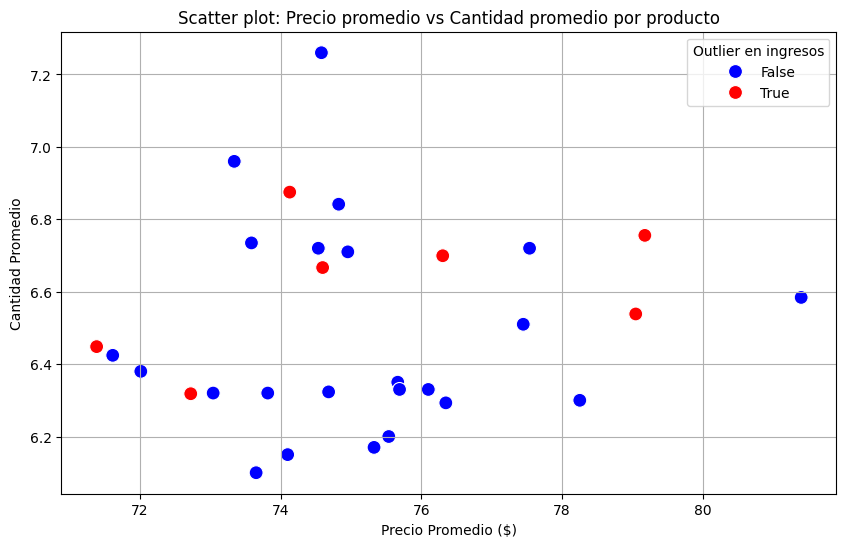

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Paso 1: Crear columnas promedio de precio y cantidad por producto ---
# Si no las tenés todavía, asumimos que se basan en ventas_limpio
promedios_por_producto = ventas_limpio.groupby('producto', as_index=False).agg(
    precio_promedio=('precio', 'mean'),
    cantidad_promedio=('cantidad', 'mean')
)

# --- Paso 2: Merge con los ingresos totales (opcional, para referencia) ---
df_plot = pd.merge(
    ingresos_por_producto,
    promedios_por_producto,
    on='producto',
    how='left'
)

# --- Paso 3: Identificar outliers de ingresos para marcar en el scatter plot ---
q1 = df_plot['total_ingresos'].quantile(0.25)
q3 = df_plot['total_ingresos'].quantile(0.75)
iqr = q3 - q1
lim_inferior = q1 - 1.5 * iqr
lim_superior = q3 + 1.5 * iqr

df_plot['es_outlier'] = ((df_plot['total_ingresos'] < lim_inferior) |
                         (df_plot['total_ingresos'] > lim_superior))

# --- Paso 4: Scatter plot ---
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_plot,
    x='precio_promedio',
    y='cantidad_promedio',
    hue='es_outlier',          # Colorea los outliers
    palette={True:'red', False:'blue'},
    s=100
)

plt.title("Scatter plot: Precio promedio vs Cantidad promedio por producto")
plt.xlabel("Precio Promedio ($)")
plt.ylabel("Cantidad Promedio")
plt.legend(title="Outlier en ingresos")
plt.grid(True)
plt.show()


# Los puntos Rojos: representan los outliers, es decir, productos que se destacan por haber generado ingresos muy distintos del resto por menos y por más.

In [ ]:
# Agregando etiquetas a los outliers

import matplotlib.pyplot as plt
import seaborn as sns

# --- Paso 1: Crear columnas promedio de precio y cantidad por producto ---
promedios_por_producto = ventas_limpio.groupby('producto', as_index=False).agg(
    precio_promedio=('precio', 'mean'),
    cantidad_promedio=('cantidad', 'mean')
)

# --- Paso 2: Merge con los ingresos totales ---
df_plot = pd.merge(
    ingresos_por_producto,
    promedios_por_producto,
    on='producto',
    how='left'
)

# --- Paso 3: Identificar outliers de ingresos ---
q1 = df_plot['total_ingresos'].quantile(0.25)
q3 = df_plot['total_ingresos'].quantile(0.75)
iqr = q3 - q1
lim_inferior = q1 - 1.5 * iqr
lim_superior = q3 + 1.5 * iqr

df_plot['es_outlier'] = ((df_plot['total_ingresos'] < lim_inferior) |
                         (df_plot['total_ingresos'] > lim_superior))

# --- Paso 4: Scatter plot con etiquetas para outliers ---
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df_plot,
    x='precio_promedio',
    y='cantidad_promedio',
    hue='es_outlier',          # Colorea los outliers
    palette={True:'red', False:'blue'},
    s=100
)

# --- NUEVO: Agregar etiquetas solo a los outliers ---
for i, row in df_plot[df_plot['es_outlier']].iterrows():
    plt.text(
        row['precio_promedio'],
        row['cantidad_promedio'],
        row['producto'],
        fontsize=9,
        color='red',
        ha='right',
        va='bottom'
    )

plt.title("Scatter plot: Precio promedio vs Cantidad promedio por producto")
plt.xlabel("Precio Promedio ($)")
plt.ylabel("Cantidad Promedio")
plt.legend(title="Outlier en ingresos")
plt.grid(True)
plt.show()


# Heatmap de correlaciones (todas las variables numéricas)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df_plot[['precio_promedio','cantidad_promedio','total_ingresos']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

## Explicación del mapa de color entre las 3 variables (ingresos totales, cantidad promedio, precio promedio, todo por producto):
1) precio promedio y cantidad promedio dio 0.09 (azul oscuro) -> Correlación casi nula (la cantidad vendida no está relacionada con el precio promedio del producto)
2) total ingresos y precio promedio dio 0.33 (celeste) -> Correlación positiva débil, quiere decir que productos mas caros pueden producir más ingresos, pero debilmente.
3) total ingresos y cantidad promedio dio 0.05 (azul oscuro) -> correlación casi nula - La cantidad promedio vendida no explica el total de ingresos.


# ****** Conclusiones finales del análisis realizado ******
1. Distribución de los ingresos por producto

Los gráficos iniciales (boxplot + histograma) mostraron que la mayoría de los productos se concentran en un rango relativamente acotado de ingresos, mientras que un pequeño grupo se distancia claramente del resto.

Existen outliers, tanto por ingresos muy altos como muy bajos.

Estos productos atípicos se confirmaron usando el método IQR (Rango Intercuartílico).

La existencia de outliers indica que el portafolio tiene productos con un rendimiento muy desigual, lo cual puede ser una oportunidad (potenciar los de alto ingreso) o una señal de alerta (revisar por qué algunos venden tan poco).

2. Ranking de ingresos por producto

El gráfico de barras permitió visualizar claramente:

Qué productos generan mayor facturación total.

Cómo se distribuyen los ingresos entre todos los ítems del catálogo.

La presencia de productos con ingresos muy bajos que, fácilmente, quedan opacados en el conjunto.

Este gráfico es útil para tomar decisiones de inventario, promociones o discontinuación.

3. Relación entre precio, cantidad vendida e ingresos

El análisis de correlaciones y los scatter plots ofrecieron una interpretación clave:

3a) Precio promedio vs. cantidad promedio

Correlación = 0.09 (casi nula)
Los precios no afectan de manera lineal cuánto se vende.
Productos caros pueden tener ventas razonables, y productos baratos no necesariamente se venden más.

3b) Ingresos totales vs. precio promedio

Correlación = 0.33 (débil positiva)
Los productos con precios algo más altos tienden levemente a generar más ingresos, pero no es una relación fuerte.
Lo que sugiere que el precio no es el factor dominante en la generación de ingresos.

3c) Ingresos totales vs. cantidad promedio

Correlación = 0.05 (nula)
El volumen promedio vendido tampoco explica los ingresos totales.
Es decir, algunos productos venden poco pero generan buen ingreso porque son caros, y otros venden mucho pero aportan poco dinero.

4. Identificación visual de outliers (alta utilidad práctica)

El scatter plot con etiquetas permitió identificar:

Qué productos se destacan realmente dentro del portfolio.

Outliers por ingresos altos → podrían ser productos estrella.

Outliers por ingresos bajos → productos a revisar en precio, demanda o estrategia comercial.

Este tipo de visualización complementa fuertemente al análisis descriptivo.

Conclusión General

El conjunto de análisis muestra un panorama claro:
Los ingresos por producto no están determinados linealmente ni por el precio ni por la cantidad vendida.
Las correlaciones bajas confirman que los productos se comportan de manera muy heterogénea, probablemente porque:
pertenecen a categorías distintas,
tienen elasticidad de precio diferente,
cumplen roles diferentes dentro del catálogo,
o responden a estacionalidad o demanda particular.

Los gráficos permitieron:

Detectar productos con desempeño excepcional (bueno o malo).
Comprender que no existe una única variable que explique las ventas.
Visualizar la distribución real de ingresos y detectar asimetrías.
Este enfoque combinado (visual + estadístico) proporciona una base sólida para tomar decisiones comerciales como:

ajustar precios,
revisar costos,
reforzar stock de productos estrella,
discontinuar productos de bajo rendimiento,
o aplicar promociones dirigidas.